# Similarity Modeling 1/2: Summary of approaches and results

## 1. Approaches Matthias Hofmaier (11944050)

### 1.1 Recognizing Kermit the Frog in Video with Feature Engineering and Machine Learning
See [video-based-feature-engineering.ipynb](video-based-feature-engineering.ipynb).

Within this notebook, we gained an overview over the ground truth data, extracted frames from the videos, performed a train/validation/test split. After that we performed feature extraction from the video frames. This involved the following steps:

1. Conversion of the video frame to HSV color space.
2. Thresholding the frame based on a range of greens, corresponding to the color of Kermit.  
3. Detect contours (shapes) in the green thresholded frame.
4. Calculation of areas of the detected contours. Our hypothesis is that we will find larger contours for frames where Kermit is present than for frames where he is not.
5. Calculation of statistics of the contour areas. If no contours were found, we will create an array of zeros.
6. Calculation of Hu Moments of the thresholded image. Hu Moments are 7 numbers calculated using central moments (weighted averages of pixel intensities) that are invariant to image translations and describe the shape present in an image.    
7. Extraction of bounding boxes from the 3 largest contours found in the image. 
8. Merging of the bounding boxes into 1 large bounding box. 
9. Using found bounding box to crop region of interest from the original frame.
10. Conversion of cropped image to HSV color space.
11. Calculation of histogram for each color channel separately. Concatenation of color channel histograms.

**Example with Kermit present:**

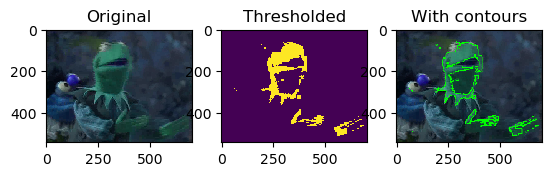
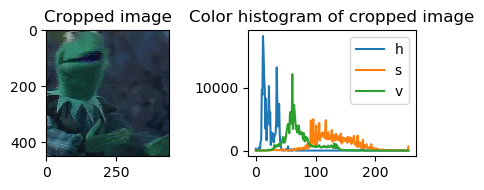

**Example with Kermit not present:**

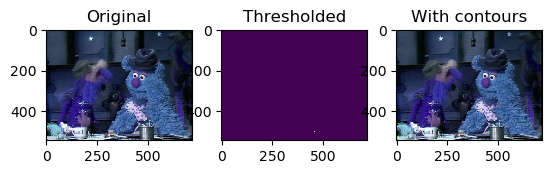
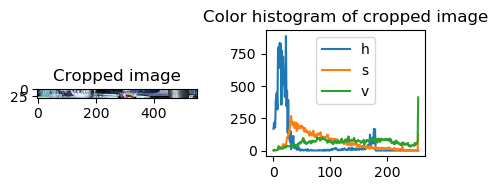



After that, we trained a Support Vector Machine and a Random Forest and performed a hyperparameter search. This did result in the performance metrics shown in the following plots:

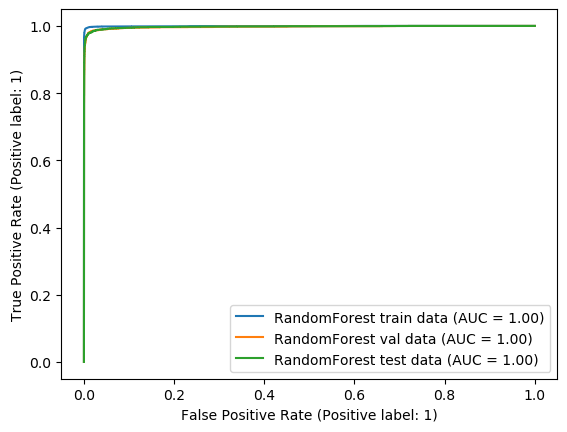
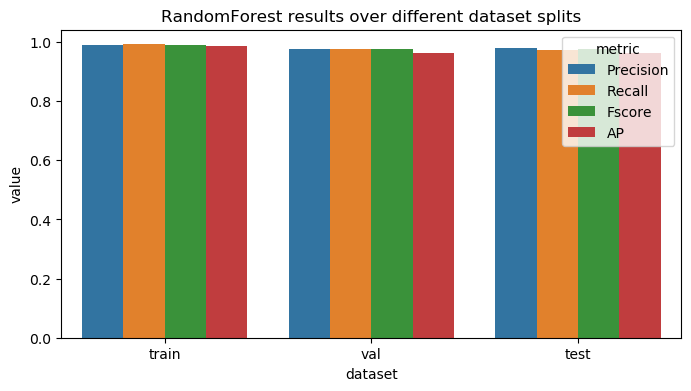

As we can observe above, the model obtains a near perfect recognition rate across all data set splits. One thing we have to note is that due to the way we split our dataset into train, validation and test, there is the possibility that frames that are directly following each other (i.e., are only very slightly different) can be in all of the dataset splits. To test how robust the classifiers perform in the wild, it would be better to use a video aware split, i.e., use one of the videos for training, one of the videos for validation and one of the videos for testing, or to use a completely new video for final evaluation and keep the current split. 

### 1.2 Recognizing Swedish Chef in Audio with Deep Learning  
See [audio-based-deep-learning.ipynb](audio-based-deep-learning.ipynb).

